In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
#import xarray as xr
import scipy.ndimage
import scipy as sp
#import alphashape
from scipy import interpolate
#from shapely.geometry import Point
#from shapely.geometry.polygon import Polygon
from matplotlib import style
from pathlib import Path  
style.use('ggplot') or plt.style.use('ggplot')

In [3]:
data = pd.read_csv('../Data/AdjustedRadarStatigraphy/DepthAdjustedStratigraphyElevation.csv', sep=",")


In [4]:
# Record the corss-section index ranges

CSs = {'CS1' : [0, 5200], 'CS2' : [6200, 12000], 'CS3' : [12100, 15500], 'CS4' : [17500, 22700], \
       'CS5' : [25000, 32500], 'CS6' : [32700, 40000], 'CS7' : [41700, 51500]}

CSs['CS1']


[0, 5200]

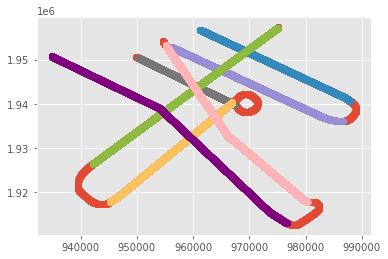

In [8]:
# Plot all coordinates

fig, ax = plt.subplots(1,1)
ax.scatter(data['psX'], data['psY'])

for i in range(1, 7):
    ax.scatter(data['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]], data['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]])

ax.scatter(data['psX'][CSs['CS7'][0]:CSs['CS7'][1]], data['psY'][CSs['CS7'][0]:CSs['CS7'][1]], color="purple")


In [14]:
# Create individual dataframes

dfs = {}
for i in range(1,8):
    dfs['data' + str(i)] = data.iloc[CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]
    dfs['data' + str(i)] = dfs['data' + str(i)].reset_index()


In [15]:
# Save all segment dataframes as csvs

for i in range(1,8):
    filepath = Path('../Data/AdjustedRadarStatigraphy/RadarSegment' + str(i) + '.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    dfs['data' + str(i)].to_csv(filepath, na_rep='NaN', index=False)

